In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

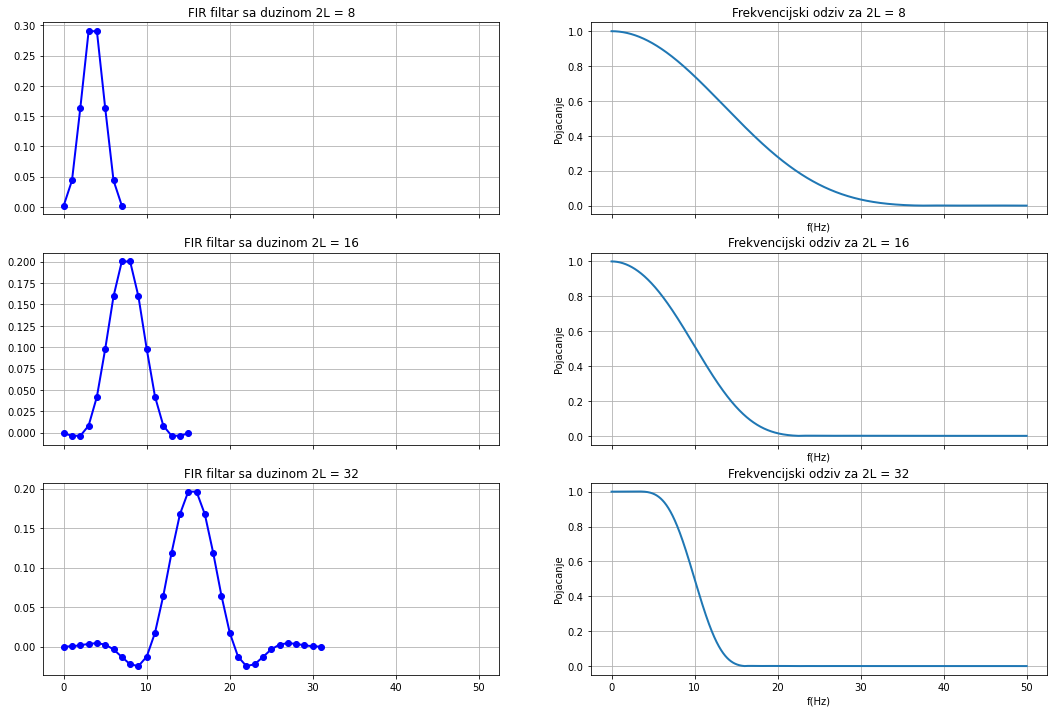

In [15]:
n = 400
fs = 100
t = np.linspace(0, n/fs, n)

# zeljene performanse
width =  [54 / (fs/2), 25 / (fs/2), 12 / (fs / 2)]
fig, ax = plt.subplots(3, 2, sharex=True)
fig.set_size_inches(18, 12)

for i in range(3):
    ripple_db = 60

    N, beta = signal.kaiserord(ripple_db, width[i]) 

    cutoff_hz = 10.0
    taps = signal.firwin(N, cutoff_hz/(fs / 2), window=('kaiser', beta))

    ax[i,0].plot(taps, 'bo-', linewidth=2)
    ax[i,0].set_title(f'FIR filtar sa duzinom 2L = {N}')
    ax[i,0].grid(True)


    w, h = signal.freqz(taps, worN=8000)
    ax[i,1].plot((w/np.pi)*fs/2, np.absolute(h), linewidth=2)
    ax[i,1].set_xlabel('f[Hz]')
    ax[i,1].set_ylabel('Pojacanje')
    ax[i,1].set_title(f'Frekvencijski odziv za 2L = {N}')
    ax[i,1].set_ylim(-0.05, 1.05)
    ax[i,1].grid(True)
